<a href="https://colab.research.google.com/github/user-Gyrus/Important-Code-and-Algos/blob/main/MLDL_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTING ALL THE REQUIRED LIBRARIES

!#pip install numpy
!#pip install pandas

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

In [5]:
#Dataset collection from kaggle
#The given link has been used for the datasets https://www.kaggle.com/datasets/nancyalaswad90/review
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [6]:
#looking into the data
diabetes_dataset.shape

(768, 9)

In [7]:
#getting to know how many are diabetic and non-diabetic
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
#Creating the X and Y parametes for the graph
X = diabetes_dataset.drop(columns = 'Outcome', axis = 1)
Y = diabetes_dataset['Outcome']
#axis = 1 implies we are dropping a column, axis = 0 implies we are dropping a row

In [9]:
#Standardizing the data
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [10]:
# re-updating the values
X = standardized_data
Y = diabetes_dataset['Outcome']

In [11]:
#Training and Testing
X_training, X_testing, Y_training, Y_testing = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state = 2)
#why test_size = 0.1? testing data is 10% of total dataset


In [12]:
#Training the model
svm_classifier = svm.SVC(kernel = 'linear')

In [13]:
svm_classifier.fit(X_training, Y_training)

SVC(kernel='linear')

In [14]:
#Let's get to know the accuracy of the training model
X_trained_prediction = svm_classifier.predict(X_training)
trained_data_accuracy = accuracy_score(X_trained_prediction, Y_training)
print(f'Accuracy of the trained data is {trained_data_accuracy*100}%')

Accuracy of the trained data is 78.43704775687411%


In [15]:
#Now, let's calculate the accuracy of the testing model
X_testing_prediction = svm_classifier.predict(X_testing)
testing_data_accuracy = accuracy_score(X_testing_prediction, Y_testing)
print(f'Accuracy of the testing data is {testing_data_accuracy*100}%')

Accuracy of the testing data is 77.92207792207793%


In [16]:
#Since the accuracy scores of both the training data and testing data is really close,
#we can say that the SVM model was trained perfectly without any cause of overfitting


In [17]:
#Let's now test our SVM Classifier!
input_data = (4, 110, 92, 0, 0, 37.6, 0.191, 30)
#we didn't give any outcome value since we will be predicting it using the classifier
input_data_in_numpyarray = np.asarray(input_data)
#reshaping it for one testing value
reshaped_input_data = input_data_in_numpyarray.reshape(1, -1)
#need to standardize the data for getting the correct output
std_data = scaler.transform(reshaped_input_data)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [18]:
#printing the standard data and printing the output
print(std_data)
predictor = svm_classifier.predict(std_data)
print(f'The output for the given data is: {predictor}')

if(predictor[0]==0):
  print("The person is non diabetic!")
else:
  print("The person is diabetic :(")


[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
The output for the given data is: [0]
The person is non diabetic!


In [19]:
#The prediction is correct!
#The model has been trained successfully!

<ipython-input-20-aef6bb7ff6ea>:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_pca[Y_set == j, 0], X_pca[Y_set == j, 1], c=ListedColormap(('green', 'red'))(i), label=j)


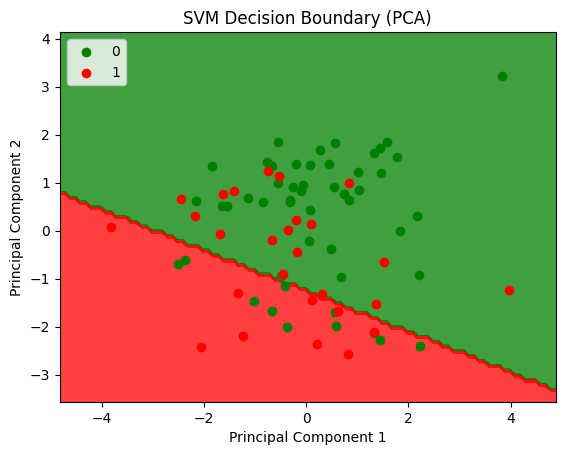

In [20]:

#PERFORMING DIMENSIONALITY REDUCTION!
# Selecting all 8 features
selected_features_indices = list(range(8))  # Indices of all 8 features
X_set = X_testing[:, selected_features_indices]
Y_set = Y_testing

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_set)

# Retrain SVM classifier using the reduced-dimensional data
svm_classifier_pca = svm.SVC(kernel='linear')
svm_classifier_pca.fit(X_pca, Y_set)

# Create a meshgrid for plotting the decision boundary
mesh_step = 0.1  # Step size for meshgrid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step), np.arange(y_min, y_max, mesh_step))

# Predict the labels for each point in the meshgrid
meshgrid_points = np.c_[xx.ravel(), yy.ravel()]
Z = svm_classifier_pca.predict(meshgrid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.75, cmap=ListedColormap(('green', 'red')))
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_pca[Y_set == j, 0], X_pca[Y_set == j, 1], c=ListedColormap(('green', 'red'))(i), label=j)

plt.title('SVM Decision Boundary (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
